# Global AI Hub - Python ile Veri Analizi Eğitimi

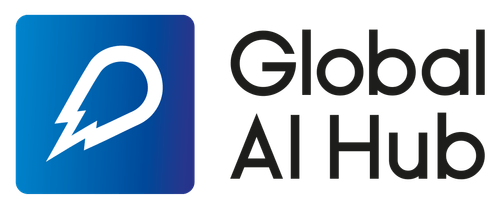

## 0. Veri Setinin Hazırlanması

**Veri Seti ve Adresi:**

Jobs and Salaries in Data Science : https://www.kaggle.com/datasets/hummaamqaasim/jobs-in-data

In [2]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

# Diğer örnek görselleştirme kütüphaneleri
# ggplot
# Bokeh
# Plotly

In [3]:
# Veri setini notebook içerisine dahil edelim.

df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/zomato-bangalore-restaurants/zomato.csv")
df = df_.copy()

##ham data df_ ile gösterilir. Asıl çalışmak istediğimiz data için df adını veriyoruz.df_ bu dataya kopyalıyoruz.

In [4]:
df_.isna().sum() # ham verisetinde bulunan eksik değer sayısına bakalım.


url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
# Eksik olmayan değerlerin sayısı
df_.notnull().sum()

url                            51717
address                        51717
name                           51717
online_order                   51717
book_table                     51717
rate                           43942
votes                          51717
phone                          50509
location                       51696
rest_type                      51490
dish_liked                     23639
cuisines                       51672
approx_cost(for two people)    51371
reviews_list                   51717
menu_item                      51717
listed_in(type)                51717
listed_in(city)                51717
dtype: int64

### Veri Setini Tanıyalım

In [6]:

[df.info()]
# Veri çerçevesi hakkında daha detaylı bilgiler sunar.
#Her sütunun veri tipi, veri tiplerinin sayısal dağılımı, bellek kullanımı, eksik değerler ve sütunların ve satırların kaç olduğu bilgisini görürüz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

[None]

In [7]:
df.head(3) 
#Bu fonksiyon, DataFrame'in ilk 5 satırını gösterir. Ancak, içine bir sayı parametresi verirseniz, o kadar satır döndürür.

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [8]:
df.describe().T
#count: Sütundaki non-null (boş olmayan) değerlerin sayısı.
#mean: Sütundaki değerlerin ortalaması.
#std: Sütundaki değerlerin standart sapması.
#min: Sütundaki en küçük değer.
#25%: Alt çeyrek yüzdesi, sütundaki değerlerin %25'inin altında olan değer.
#50%: Medyan veya ortanca, sütundaki değerlerin yarısından küçük ve yarısından büyük olan değer.
#75%: Üst çeyrek yüzdesi, sütundaki değerlerin %75'inin altında olan değer.
#max: Sütundaki en büyük değer.

,count,mean,std,min,25%,50%,75%,max
votes,51717.0,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0


In [9]:
# Veri setinde rasgele eksik veriler oluşturalım.


import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.01,
                              seed: random = 35) -> pd.DataFrame:
    
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

        
##Veri setinde random parametresi kullanıyoruz.Verinin float olarak verdiğimiz değerin yüzdesi kadar rastgele datayı boş yani NaN yapıyor.
Bu fonksiyonda seed parametresini kullanmayı da tercih ediyoruz.Çünkü dosyayı kapatıp açtığımız da rastgele yapılan boş değerler sabitlenmesi için .

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

## 1. Veriye İlk Bakış

In [10]:
# Veri setinin ilk 5 gözlemini görelim.
df.head()

# Sondan 5 gözlem için tail() metodu kullanılabilir.
# df.tail(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,NaN,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
df.columns #Veri setindeki kolonları görelim. Veri setindeki değişkenlerin isimlerine erişmek istersek kullanabiliriz.

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Veri setindeki satır ve sütun sayılarını `.shape` kullanarak görebiliriz.

In [12]:
df.shape # -> (satır, sütun) # Veri setinde kaç gözlem var ? Bunu shape atribute ile yaparız.Sonunda parantez yoksa atributedir var ise metotdur.

(51717, 17)

In [13]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n") #Veri tipini görüntülemeyi alışkanlık haline getirelim.

['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'] 

Veri seti içerisinde toplam 17 kolon vardır.
df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



`info()` metodunu kullanarak, veri setine ait yapısal bilgilere ulaşabiliriz.

Bu noktada elimizde kolonların veri tiplerinin doğru olup olmadığını, kayıt sayılarını, kolon isimlerini mutlaka kontrol etmeliyiz.

In [14]:
df.info()   ## Veri setine ait bilgiye ulaşabiliriz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          50211 non-null  object 
 1   address                      50155 non-null  object 
 2   name                         50216 non-null  object 
 3   online_order                 50209 non-null  object 
 4   book_table                   50243 non-null  object 
 5   rate                         42587 non-null  object 
 6   votes                        50149 non-null  float64
 7   phone                        49049 non-null  object 
 8   location                     50155 non-null  object 
 9   rest_type                    49936 non-null  object 
 10  dish_liked                   22934 non-null  object 
 11  cuisines                     50128 non-null  object 
 12  approx_cost(for two people)  49871 non-null  object 
 13  reviews_list    

Sadece elimizdeki değişkenleri görmek ve tiplerini görüntülemek istersek, `dtypes` kullanabiliriz.

In [15]:
df.dtypes  ##her bir kolonun veri tipi bu şekilde de görebiliriz.

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                          float64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

Elimizdeki veri setinde kategorik ve numerik özellikler birlikte bulunmakta. Bu özellikleri ayırmak ve farklı değişken listelerinde kullanmak bizim için faydalı olabilir, özellikle kolon bazlı işlemler yapmak istersek bu listeleri bir filtre olarak kullanabiliriz.

**UYARI !**: Veri setinin ham halinde, kolonların veri tipleri her zaman olması gerektiği haliyle olmayabilir. Kategorik ve numerik kolonları ayırırken öncelikle her değişkenin doğru veri tipinde olduğundan emin olmalısınız.

In [16]:
categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)

##Verisetinde data tipi object ya da kategorik ise bunu kategorik olarak veri sertine at değilse nümerik veri setine at.
        ##DataFrame'deki sütunları veri tipine göre kategorik ve sayısal özelliklere ayırmaktadır. 
             



In [17]:
# ALIŞTIRMA: List comprehension nasıl kullanılır öğrenin ve yukarıdaki listeleri bu yapıyı kullanarak oluşturmaya çalışın.

            ## Bunu list comprehension kullanarak 

categorical_features = [col for col in df.columns if (df[col].dtype == "object") or (df[col].dtype == "category")]
numerical_features = [col for col in df.columns if col not in categorical_features]

In [18]:
categorical_features

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

In [19]:
numerical_features

['votes']

Örneğin, veri tipi Object olan kategorik değişkenlerin veri tipini Categorical olarak değiştirmek istersek, basitçe kolon isimleri üzerinde bir döngü kurarak filtreleme yapabiliriz.

Döngü içerisinde, mevcut kolon ismi categorical_features içerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim, bulunmuyorsa bir işlem yapmayalım.

In [20]:
for col in df. columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])
        

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   url                          50211 non-null  category
 1   address                      50155 non-null  category
 2   name                         50216 non-null  category
 3   online_order                 50209 non-null  category
 4   book_table                   50243 non-null  category
 5   rate                         42587 non-null  category
 6   votes                        50149 non-null  float64 
 7   phone                        49049 non-null  category
 8   location                     50155 non-null  category
 9   rest_type                    49936 non-null  category
 10  dish_liked                   22934 non-null  category
 11  cuisines                     50128 non-null  category
 12  approx_cost(for two people)  49871 non-null  category
 13  r

In [22]:
df['votes'][:3]

0    775.0
1    787.0
2    918.0
Name: votes, dtype: float64

Veri setimizin betimsel istatistiklerine ulaşmak için `describe()` fonksiyonunu kullanıyoruz.

Bu fonksiyon eksik verileri göz ardı eder ve default olarak yalnızca numerik değişkenlere bakar.

In [23]:
df.describe().T # -> .T eklentisi elde edeceğimiz çıktıyı transpose eder.

# df.describe(include = "all") -> Veri setindeki tüm değişkenleri dahil etmek için include parametresine "all" değerini verebilirsiniz.

,count,mean,std,min,25%,50%,75%,max
votes,50149.0,283.356258,803.139832,0.0,7.0,41.0,198.0,16832.0


## 2. Eksik Veri Analizi

Eksik Veri Analizi ile, veri setimizdeki eksik verileri tespit edip bu durumu uygun bir şekilde düzeltmeyi hedefleriz.

Veri seti içerisinde eksik değerler bulunması yapısal bir bozukluğa işaret eder ve mutlaka uygun yöntemlerle ele alınmalıdır.

Eksik veriler, duruma bağlı olarak veri setinden silinebilir veya uygun veriler ile doldurulabilir. Ancak eksik verilerin silinmesi, silinen satır veya sütunlar içerisinde yer alan diğer verilerin kaybedilmesi anlamına gelir. Eksik verilerin doldurulması işleminde ise, veri setine sentetik bir girdi yapacağımızdan dolayı, doldurma işlemleri veri setindeki dağılımları manipüle edebilir (veri setinde yanlılık oluşturabilir).

Eksik verilerin ne sebeple ortaya çıktığı hassas bir şekilde değerlendirilmeli, nasıl ele alınacağı da bu değerlendirme sonucunda uygun şekilde karar verilmelidir.

### 2.1 Eksik Verilerin Gözlemlenmesi

In [24]:
df.isna().sum() # -> isna() methodu yerine isnull() methodu da kullanılabilir.

# ALIŞTIRMA: Her bir değişken için, o değişkendeki eksik değer sayısının toplam kayıt sayısının % kaçı olduğunu bulunuz.
## 62497 eksik gözlem sayısı /(62497+816692 )*100 data setine randam eklenen oran %7,11
## 37700 eksik gözlem sayısı /(37700+841489)*100 ham datada eksik veri yüzdesi %4,28


url                             1506
address                         1562
name                            1501
online_order                    1508
book_table                      1474
rate                            9130
votes                           1568
phone                           2668
location                        1562
rest_type                       1781
dish_liked                     28783
cuisines                        1589
approx_cost(for two people)     1846
reviews_list                    1459
menu_item                       1585
listed_in(type)                 1476
listed_in(city)                 1499
dtype: int64

Veri setindeki toplam eksik değer sayısını görmek için tekrar sum() fonksiyonu ekleyebiliriz.

In [25]:
print(f"veri setinde toplam eksik veri: {df.isna().sum()}")  #Eksik kayıtları görüyoruz.

veri setinde toplam eksik veri: url                             1506
address                         1562
name                            1501
online_order                    1508
book_table                      1474
rate                            9130
votes                           1568
phone                           2668
location                        1562
rest_type                       1781
dish_liked                     28783
cuisines                        1589
approx_cost(for two people)     1846
reviews_list                    1459
menu_item                       1585
listed_in(type)                 1476
listed_in(city)                 1499
dtype: int64


In [26]:
print(f"veri setinde eksik olmayan veri sayısı: {df.notnull().sum().sum() } ") # Eksik olmayan değerlerin sayısı 

veri setinde eksik olmayan veri sayısı: 816692 


In [27]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.
print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 816692 adet eksik olmayan, 62497 eksik gözlem var.


In [28]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,NaN,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,NaN,8.0,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556.0,080 48653961\r\n080 48655715,Banashankari,NaN,"Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,NaN,504.0,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,NaN
10,https://www.zomato.com/bangalore/caf%C3%A9-dow...,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,NaN,4.1/5,402.0,080 26724489\r\n+91 7406048982,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27.0,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0.0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0.0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236.0,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,NaN


In [29]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286.0,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [30]:
##missingno kütüphanesini yükleyebilirsiniz.Missingno kütüphanesi, eksik verileri görselleştirmek için güçlü bir araçtır.


!pip install missingno


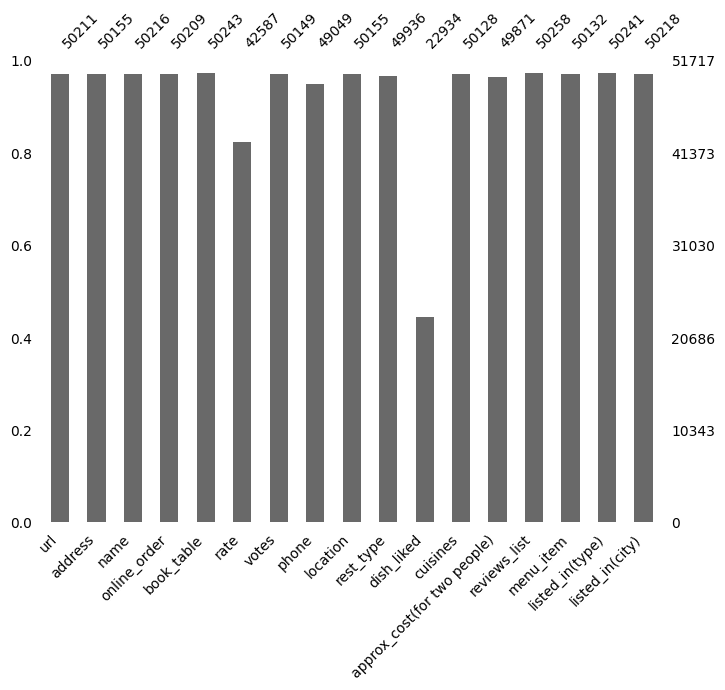

In [31]:

import missingno as msno

msno.bar(df = df,
         figsize = (8, 6),
         fontsize = 10);

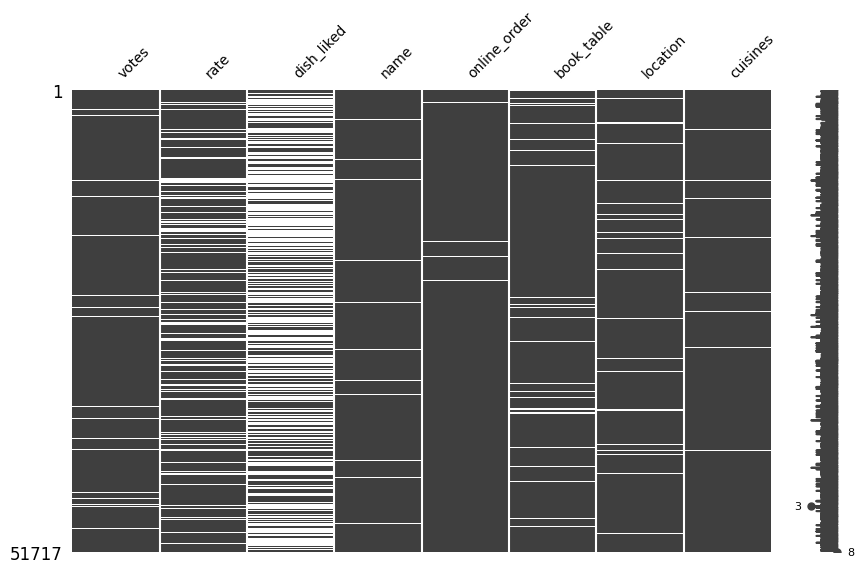

In [32]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['votes','rate', 'dish_liked','name','online_order','book_table','location','cuisines']],
            figsize = (10, 6),
            fontsize = 10);

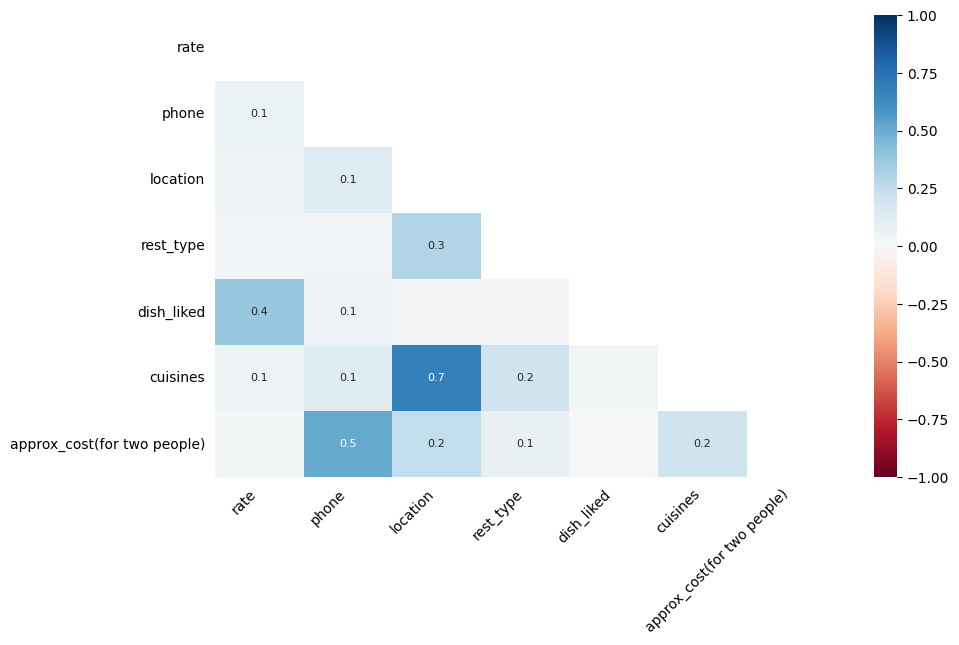

In [33]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df= df_,
             figsize = (10, 6),
             fontsize = 10);

##Ham data da zaten eksik değerler olduğu için heat görselleştirmesinde bir ilişki kurabilmesi adına bu şekilde düşündüm.

### 2.2 Yöntem 1: Eksik Verilerin Silinmesi

Veri setinde bulunan eksik verilere müdahale yöntemlerinden birisi, eksik verilerin silinmesidir. Uygulaması oldukça kolay bir yöntem olsa da eksik verileri silmeden önce dikkat edilmesi gereken önemli hususlar vardır.

1. Eksik bir verinin bulunduğu gözlemi silmeya karar verebilmek için, bu eksikliğin doğal olmayan bir şekilde ortaya çıktığından emin olmamız gerekir. Örneğin elimizdeki bir araç veri setinde elektrikli araçlar için motor hacmi kolonunda Na değer bulunması doğal bir eksikliğe işaret eder. Bu durumda silme işlemi yerine uygun bir şekilde doldurmak tercih edilebilir.
   
2. Eksik veriler veri setinde kayda değer bir yüzdeyi oluşturuyorsa, eksik verilerin silinmesi durumunda veri setindeki birçok gözlemi kaybedeceğimiz unutulmamalıdır. Bu durumda veri seti içerisinde bize bilgi sağlayabilecek birçok veriyi de kaybetmiş olacağız. Verinin olabildiğince fazla olması, hem analitik yöntemler hem de makine öğrenmesi yöntemleri için oldukça önemli olduğuna göre, veri setinden olabildiğince az kayıp verecek yöntemler denemeliyiz.

In [34]:
# Eksik verilerin dropna ile silinmesi.
# Kalıcı bir değişiklik yapmaz, bunu yapmak için inplace argümanı kullanılmalı veya atama yapılmalıdır.

df_clear=df.dropna(inplace = False)[:3]
#df = df.dropna()
print (df_clear)
##implace argümanına true dersek bu veri setinden eksik verileri silmiş olup kaydetmiş oluruz.


##Mevcut durumda veri setimizde ne kadar eksik data var ? Ekleme yapıldığında mevcut veri setindeki % olarak ne kadar değişti ?

                                                 url  \
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   

                                             address                   name  \
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   

  online_order book_table   rate  votes           phone      location  \
1          Yes         No  4.1/5  787.0    080 41714161  Banashankari   
2          Yes         No  3.8/5  918.0  +91 9663487993  Banashankari   
3           No         No  3.7/5   88.0  +91 9620009302  Banashankari   

             rest_type                                         dish_liked  \
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Ca

In [35]:
# Sadece bütün değerleri eksik olan bir gözlemi silmek istersek;
df_clear.dropna(how = 'all')[:5]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [36]:
# Değişken bazında silmek için;
df_clear.dropna(axis = 1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88.0,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


### 2.3 Yöntem 2: Eksik Verilerin Doldurulması

Eksik verilerin doldurulması kararı, silinmesi işleminde olduğu gibi hassas ve bilinçli bir şekilde değerlendirilmesi gereken bir karardır. Zira doldurma işlemi veride gürültü (noise) oluşturabilir ve verinin istatistiksel olarak güvenilirliğini zedeleyebilir. Analitik durumlar içinse yanlış bilgi çıkarımlarına sebebiyet verebilir. Bu nedenle en sağlıklı doldurma kararının alındığı durumlarda dahi bu yanlılık durumu mutlaka göz önünde bulundurulmalıdır.

In [37]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum.
df_fillna = df.copy()

df_fillna.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775.0,080 42297555\r\n+91 9743772233,Banashankari,NaN,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787.0,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [38]:
df_fillna.isna().sum()

url                             1506
address                         1562
name                            1501
online_order                    1508
book_table                      1474
rate                            9130
votes                           1568
phone                           2668
location                        1562
rest_type                       1781
dish_liked                     28783
cuisines                        1589
approx_cost(for two people)     1846
reviews_list                    1459
menu_item                       1585
listed_in(type)                 1476
listed_in(city)                 1499
dtype: int64

#### 2.3.1 Sayısal Değişkenlerin Doldurulması

In [39]:
# Numerik bir değişkenin medyan değeriyle doldurulması

##sağa doğru pozitif basıklık olduğu için meadyan ile doldurulması daha doğru.


# 'votes' sütununun medyanını hesapla
median_votes = df_fillna['votes'].median()

# Eksik değerleri (NaN) medyan ile doldur
df_fillna['votes'] = df_fillna['votes'].fillna(value=median_votes)

# Eksik değerlerin doldurulup doldurulmadığını kontrol et
print(df_fillna.isna().sum())


url                             1506
address                         1562
name                            1501
online_order                    1508
book_table                      1474
rate                            9130
votes                              0
phone                           2668
location                        1562
rest_type                       1781
dish_liked                     28783
cuisines                        1589
approx_cost(for two people)     1846
reviews_list                    1459
menu_item                       1585
listed_in(type)                 1476
listed_in(city)                 1499
dtype: int64


In [40]:
numerical_features

['votes']

In [41]:
# Doldurma işleminin döngüyle yapılması 
to_be_filled = numerical_features[3:]

for col in to_be_filled:
    df_fillna[col].fillna(df[col].mean(), inplace = True)

##Sadece votes nümerik olduğu için döngüye gerek yok.

In [42]:
df_fillna.isna().sum()

url                             1506
address                         1562
name                            1501
online_order                    1508
book_table                      1474
rate                            9130
votes                              0
phone                           2668
location                        1562
rest_type                       1781
dish_liked                     28783
cuisines                        1589
approx_cost(for two people)     1846
reviews_list                    1459
menu_item                       1585
listed_in(type)                 1476
listed_in(city)                 1499
dtype: int64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes,50149.0,283.356258,803.139832,0.0,7.0,41.0,198.0,16832.0


Doldurma işlemini mean yerine median değer ile de gerçekleştirebiliriz, ancak bunu kuyruklu (skewed) dağılımlarda yapmayı tercih ediyoruz.

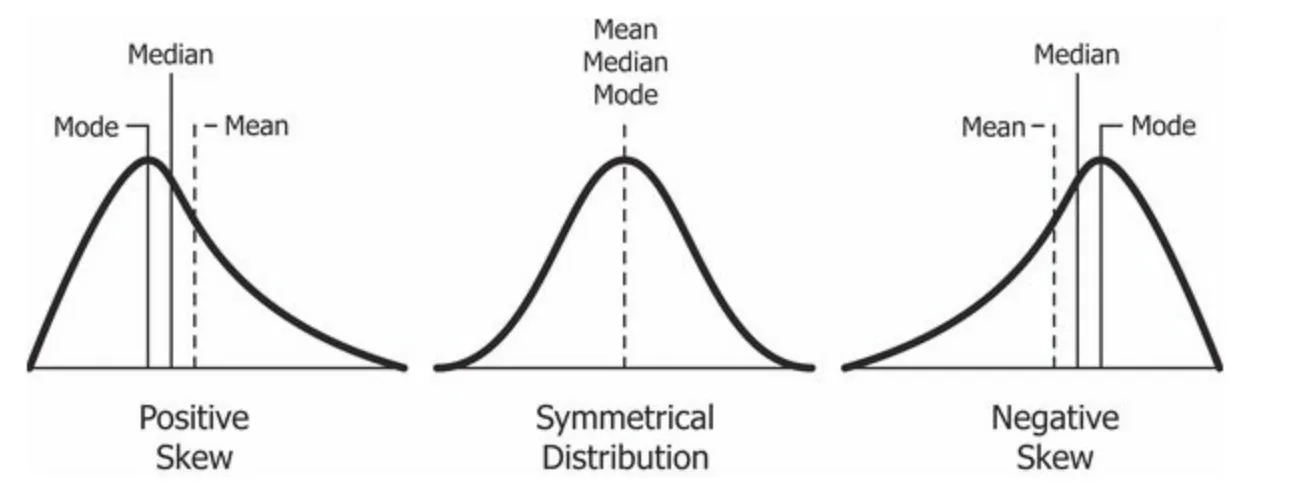

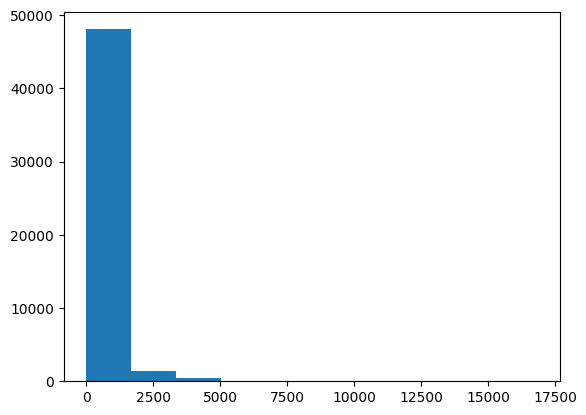

In [44]:
# Bir sayısal değişkenin dağılımını görmek için histogram kullanabiliriz.
plt.hist(df['votes'])
plt.show()

#### 2.3.2 Kategorik Değişkenlerin Doldurulması

In [45]:
# Kategorik bir değişkenin mode değeriyle doldurulması

# cuisines değişkeninde toplam kaç adet eksik değer olduğunu görelim.
df_fillna['cuisines'].isna().sum()

# cuisines değişkeninde en çok tekrar eden değeri(mode) alalım.
cuisines_mode = df_fillna['cuisines'].mode()

# cuisines değişkenini mode değeri ile dolduralım.
df_fillna['cuisines'] = df_fillna['cuisines'].fillna(value = cuisines_mode[0])

# Veri setinde bulunan cuisines kolonunda toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna['cuisines'].isna().sum()

0

In [46]:
df_fillna[["cuisines"]][:10] #ilk 10 değerine bakalım

,cuisines
0,"North Indian, Mughlai, Chinese"
1,"Chinese, North Indian, Thai"
2,"Cafe, Mexican, Italian"
3,"South Indian, North Indian"
4,"North Indian, Rajasthani"
5,North Indian
6,"North Indian, South Indian, Andhra, Chinese"
7,"Pizza, Cafe, Italian"
8,"Cafe, Italian, Continental"
9,"Cafe, Mexican, Italian, Momos, Beverages"


In [47]:
[df_fillna.isna]

[<bound method DataFrame.isna of                                                      url  \
 0      https://www.zomato.com/bangalore/jalsa-banasha...   
 1      https://www.zomato.com/bangalore/spice-elephan...   
 2      https://www.zomato.com/SanchurroBangalore?cont...   
 3      https://www.zomato.com/bangalore/addhuri-udupi...   
 4      https://www.zomato.com/bangalore/grand-village...   
 ...                                                  ...   
 51712  https://www.zomato.com/bangalore/best-brews-fo...   
 51713  https://www.zomato.com/bangalore/vinod-bar-and...   
 51714  https://www.zomato.com/bangalore/plunge-sherat...   
 51715  https://www.zomato.com/bangalore/chime-sherato...   
 51716  https://www.zomato.com/bangalore/the-nest-the-...   
 
                                                  address  \
 0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
 1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
 2      1112, Next to KIMS Medical College, 17th Cr

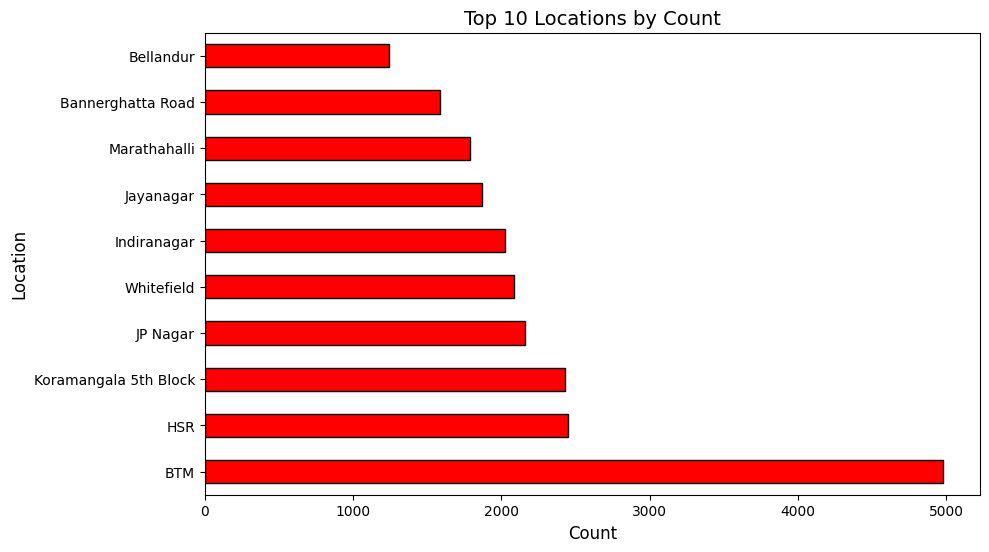

In [48]:
# Kategorik bir değişkendeki kategorilerin gözlem sayılarını basitçe görselleştirelim.

# En fazla 10 lokasyonu getir ve görselleştir
df['location'].value_counts().head(10).plot.barh(figsize=(10, 6), color="red", edgecolor="black")
plt.title("Top 10 Locations by Count", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


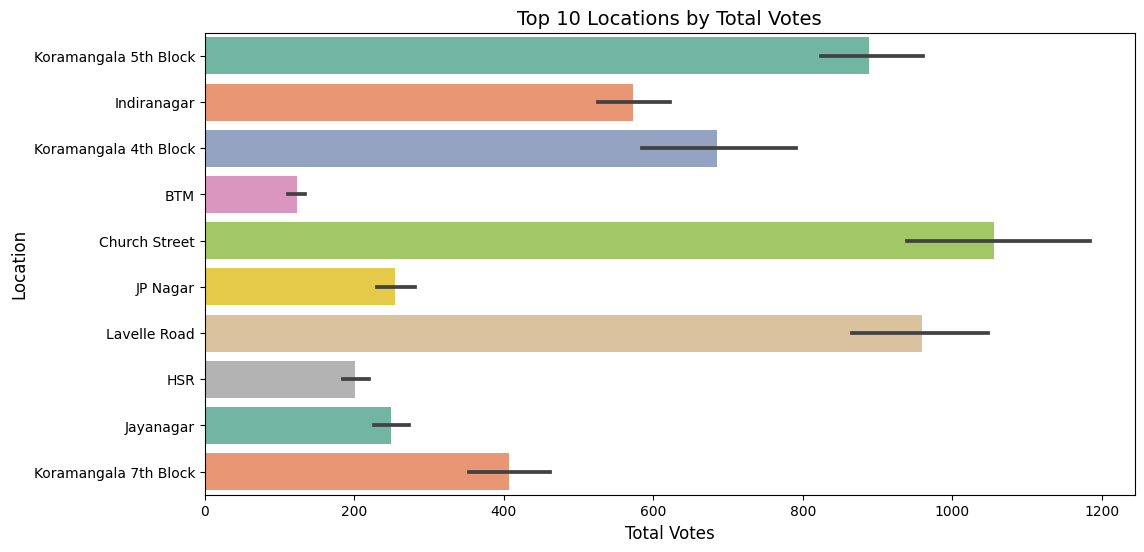

In [49]:
#### Bu lokasyanlarda en çok oy alan ve ortalaması en yüksek olan yerler tercih edilebilir.
import seaborn as sns
import matplotlib.pyplot as plt

# Votes'e göre en çok değerlendirilen ilk 10 lokasyonu al
top_locations = (
    df.groupby("location", observed=False)["votes"]
    .sum()
    .nlargest(10)
    .index
)

# Bu lokasyonların rate ortalamalarını çubuk grafikte göster
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df[df["location"].isin(top_locations)],
    x="votes",
    y="location",
    order=top_locations,
    palette="Set2"
)
plt.title("Top 10 Locations by Total Votes", fontsize=14)
plt.xlabel("Total Votes", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


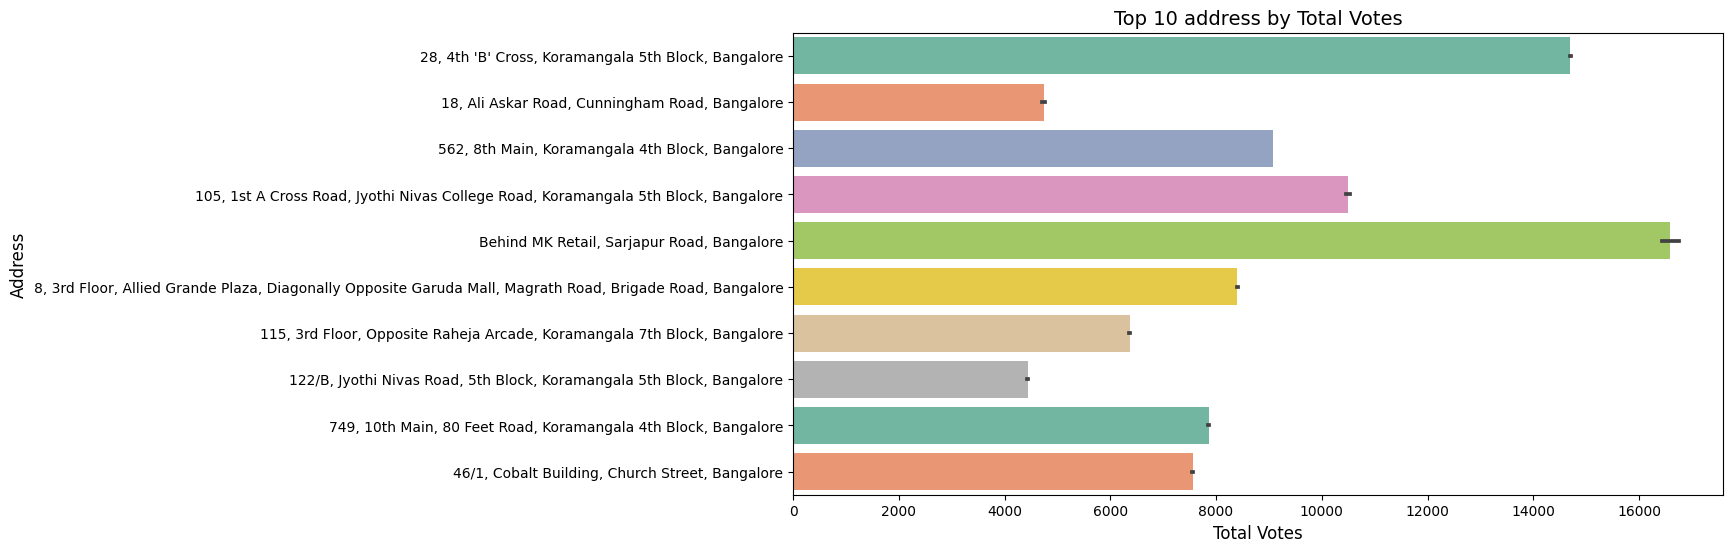

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Votes'e göre en çok değerlendirilen ilk 10 adresi al
top_address = (
    df.groupby("address", observed=False)["votes"]
    .sum()
    .nlargest(10)
    .index
)

# Bu adreslerin rate ortalamalarını çubuk grafikte göster
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df[df["address"].isin(top_address)],
    x="votes",
    y="address",
    order=top_address,
    palette="Set2"
)
plt.title("Top 10 address by Total Votes", fontsize=14)
plt.xlabel("Total Votes", fontsize=12)
plt.ylabel("Address", fontsize=12)
plt.show()

##İyi bir yemek tercihimizi bu adreslere göre yapabiliriz.

In [56]:
# Öncelikle iki kişilik ödeme sutununun tipini floata çeviriyoruz.

df["approx_cost(for two people)"] = (
    df["approx_cost(for two people)"]
    .str.replace(",", "")  # Eğer binlik ayırıcı varsa kaldır
    .str.extract("(\d+\.?\d*)")[0]  # Sayısal kısmı al
    .astype(float)  # Float'a dönüştür
)

In [58]:
# Lokasyonlara göre toplam ödemeleri hesapla
total_payments_by_location = (
    df.groupby("location", observed=False)["approx_cost(for two people)"]
    .sum()
    .sort_values(ascending=False)
)


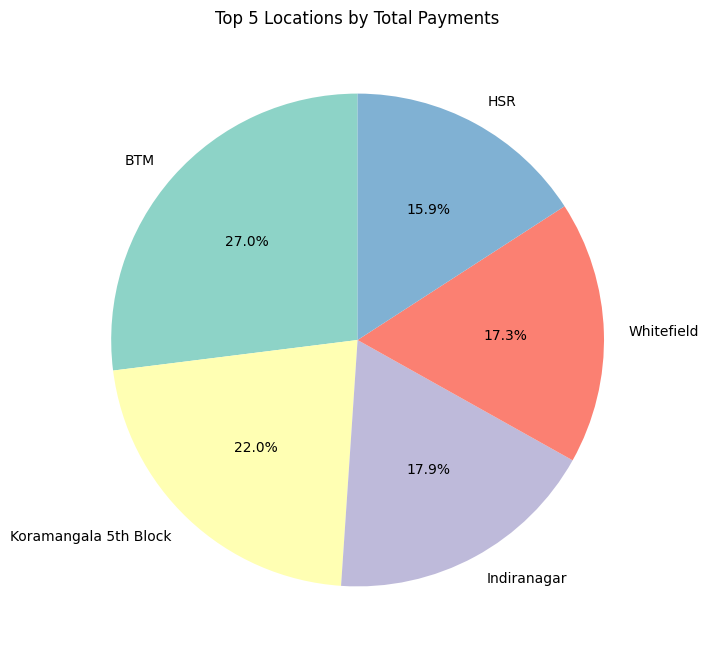

In [59]:
# İlk 5 lokasyonu seç
top_payment_locations = total_payments_by_location.head(5)

# Pasta grafiği oluşturalım. Lokasyonlara göre en fazla ücret ödenen yerleri % olarak görüntüleyelim.
plt.figure(figsize=(8, 8))
top_payment_locations.plot.pie(
    autopct='%1.1f%%',
    colors=sns.color_palette("Set3"),
    startangle=90
)
plt.title("Top 5 Locations by Total Payments")
plt.ylabel("")  # Y eksen başlığını kaldırmak için
plt.show()
